# Modeling 4: Regression

## Anforderungen an Projektumsetzung: Regression


Falls die Anforderungen auf den eigenen Projektdatensatz nicht anwendbar sind, gibt es folgende Möglichkeiten:

- Für diese Übung ein realwertiges Feature des Datensatzes zur Zielvariablen erklären
und/oder
- als Kategorien oder String-Werte hinterlegte Features entweder ausschließen oder im Notfall als Zahlen codieren

- Datensatz um passende Daten erweitern entweder manuell, per Anspielen aus weiterer Datenquelle oder zur Not per zufälliger Datengenerierung/-simulation

- Datensatz außerhalb des Projekts wählen und Anforderungen daran umsetzen

Anforderungen:
- Entscheiden Sie, ob Sie mit der linearen Regression modellieren, prädizieren, oder beides erreichen wollen.

- Führen Sie die entsprechende(n) Analyse(n) methodisch sauber durch und berichten Sie entsprechend der    eingeführten Kriterien und Evaluationsmaße das Ergebnis.
  
- Wenn Sie sowohl modellieren als auch prädizieren wollen, führen Sie die Modellierung nur auf den Trainingsdaten durch, um zu vermeiden, dass Sie ungewollt aus Ihren Testdaten lernen. Trainieren Sie das Prädiktionsmodell im zweiten Schritt aufgrund der Erkenntnisse der Modellierung.

#### Laden der Bibliotheken & des Datensatzes

In [159]:
# Import der benötigten Bibliotheken

import importlib
import init_notebook

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as RMSE
from sklearn.preprocessing import PolynomialFeatures 

In [160]:
importlib.reload(init_notebook)

dataset = init_notebook.get_final_dataset()

#### Entscheiden Sie, ob Sie mit der linearen Regression modellieren, prädizieren, oder beides erreichen wollen.

Für dieses Notebook wird zunächst der Ansatz der Modellierung gewählt. Später wird zudem eine Prädiktion durchgeführt. 

Durch Modellierung wird versucht neue und tiefgreifendere Erkentnisse zu gewinnen. 
Ziel wäre es beispielsweise Aussagen treffen zu können wie: "Personen mit dem Merkmal X neigen dazu an Hypertonie erkrankt zu sein". 

Als Zielvariable wird das Feature "Gewicht" gewählt, da unser Datensatz nur wenige passende numerische Werte vorgibt und das Feature auch ohne spezifisches Fachwissen verstanden werden kann. 

#### Führen Sie die entsprechende(n) Analyse(n) methodisch sauber durch und berichten Sie entsprechend der eingeführten Kriterien und Evaluationsmaße das Ergebnis.

In [161]:
# Trennung in des Dataset in Frauen und Männer
data_m = dataset[dataset['Geschlecht'] == 1]

data_f = dataset[dataset['Geschlecht'] == 0]

In [162]:
# Zunächst wird nur der Vergleich zwischen Gewicht und Hüftumfang angeschaut, hierbei werden die Analysen für Männer und Frauen getrennt voneinander durchgeführt. 
# Männer 
gewicht_1m= ols("Gewicht ~ Hüftumfang", data_m).fit()

print(gewicht_1m.summary())

                            OLS Regression Results                            
Dep. Variable:                Gewicht   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                 7.578e+05
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:00:39   Log-Likelihood:            -1.7833e+06
No. Observations:              526158   AIC:                         3.567e+06
Df Residuals:                  526156   BIC:                         3.567e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.1345      0.103   -185.742      0.0

Das Modell versucht, die Beziehung zwischen der abängige Variable (Gewicht) und der unabhängigen Variablen (Hüftumfang) zu modellieren, um zu verstehen, wie diese Variable das Gewicht beeinflussen könnte.

Das Bestimmtheitsmaß erzielt einen Wert von 59%. Nachdem redizieren erhält man eine Korrelation von 0.77 für den Datensatz der Männer. 

In [163]:
# Frauen 
gewicht_1f= ols("Gewicht ~ Hüftumfang", data_f).fit()

print(gewicht_1f.summary())

                            OLS Regression Results                            
Dep. Variable:                Gewicht   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                 4.699e+05
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:00:39   Log-Likelihood:            -1.5119e+06
No. Observations:              464811   AIC:                         3.024e+06
Df Residuals:                  464809   BIC:                         3.024e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6444      0.078     34.030      0.0

Das Bestimmtheitsmaß erzielt einen Wert von 50,3%. Nachdem redizieren erhält man eine Korrelation von 0.71 für den Datensatz der 
Frauen. 

Es zeigt sich, dass trotz selber Parameter die Korrelation bei den Männern etwas höher ist als bei den Frauen.

In [164]:
# In einem nächsten Schritt werden zunächst einmal intuitiv weitere Features hinzugenommen um zu untersuchen, wie sich diese auswirken: 

#Männer 
gewicht_2m= ols("Gewicht ~ Hüftumfang + Größe + Alter + LDL_Cholesterin", data_m).fit()

print(gewicht_2m.summary())

                            OLS Regression Results                            
Dep. Variable:                Gewicht   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                 4.869e+05
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:00:39   Log-Likelihood:            -1.6107e+06
No. Observations:              526158   AIC:                         3.221e+06
Df Residuals:                  526153   BIC:                         3.222e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -99.0313      0.223   -4

Das Bestimmtheitsmaß erzielt einen Wert von 78,7%. Nachdem redizieren erhält man eine Korrelation von 0.89 für den Datensatz der Männer. 

In [165]:
# Frauen 
gewicht_2f= ols("Gewicht ~ Hüftumfang + Größe + Alter + LDL_Cholesterin", data_f).fit()

print(gewicht_2f.summary())

                            OLS Regression Results                            
Dep. Variable:                Gewicht   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                 2.508e+05
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:00:39   Log-Likelihood:            -1.4070e+06
No. Observations:              464811   AIC:                         2.814e+06
Df Residuals:                  464806   BIC:                         2.814e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -74.9168      0.233   -3

Das Bestimmtheitsmaß erzielt einen Wert von 68,3%. Nachdem redizieren erhält man eine Korrelation von 0.83 für den Datensatz der Frauen. 

In [166]:
# Es werden andere Features hinzugenommen, die mit dem Gewicht korrelieren:

#Männer 
gewicht_3m= ols("Gewicht ~ Hüftumfang + Größe + Hämoglobin + Raucher_Status + Trinker", data_m).fit()

print(gewicht_3m.summary())

                            OLS Regression Results                            
Dep. Variable:                Gewicht   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                 3.382e+05
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:00:40   Log-Likelihood:            -1.6395e+06
No. Observations:              526158   AIC:                         3.279e+06
Df Residuals:                  526152   BIC:                         3.279e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -136.6024      0.209   -652.

In [167]:
# Frauen 
gewicht_3f= ols("Gewicht ~ Hüftumfang + Größe + Hämoglobin + Raucher_Status + Trinker", data_f).fit()

print(gewicht_3f.summary())

                            OLS Regression Results                            
Dep. Variable:                Gewicht   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                 1.877e+05
Date:                Tue, 09 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:00:40   Log-Likelihood:            -1.4175e+06
No. Observations:              464811   AIC:                         2.835e+06
Df Residuals:                  464805   BIC:                         2.835e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -92.6424      0.221   -419.

Die vorherige Untersuchung mit den Features Hüftumfang, Größe, Alter & LDL_Cholesterin konnte bessere Werte aufweisen.

In [168]:
# Modellvergleich mit ANOVA 

anova_results = anova_lm(gewicht_1m, gewicht_2m, gewicht_3m)

print('\nANOVA results')
print(anova_results)


ANOVA results
   df_resid           ssr  df_diff       ss_diff              F  Pr(>F)
0  526156.0  2.706933e+07      0.0           NaN            NaN     NaN
1  526153.0  1.404931e+07      3.0  1.302002e+07  145684.575541     0.0
2  526152.0  1.567429e+07      1.0 -1.624984e+06  -54547.189887     1.0


Um herauszufinden, ob welche Auswertung am besten ist, führen wir eine ANOVA Analyse durch.

Da der Wert Pr(>F) von gewicht_2m kleiner als 0.05 ist, ist dieses tatsächlich besser als gewicht_1m.

gewicht_3m ist jedoch nicht besser als gewicht_2m, da der Wert Pr(>F) von gewicht_3m größer als 0.05 ist.

In [169]:
# Modellvergleich mit ANOVA 

anova_results = anova_lm(gewicht_1f, gewicht_2f, gewicht_3f)

print('\nANOVA results')
print(anova_results)


ANOVA results
   df_resid           ssr  df_diff       ss_diff             F  Pr(>F)
0  464809.0  1.819974e+07      0.0           NaN           NaN     NaN
1  464806.0  1.158683e+07      3.0  6.612912e+06  84520.052149     0.0
2  464805.0  1.212223e+07      1.0 -5.354041e+05 -20529.100683     1.0


Bei den Daten der Frauen ergibt sich dasselbe Ergebnis wie bei den Männern.

#### Wenn Sie sowohl modellieren als auch prädizieren wollen, führen Sie die Modellierung nur auf den Trainingsdaten durch, um zu vermeiden, dass Sie ungewollt aus Ihren Testdaten lernen. Trainieren Sie das Prädiktionsmodell im zweiten Schritt aufgrund der Erkenntnisse der Modellierung.

Zusätzlich zur Modellierung wird auch eine Prädiktion durchgeführt. Hier soll das Gewicht eines Probanden vorausgesagt werden. 
Um auch hier auf die biologischen Unterschiede zwischen den Geschlechtern zu achten, wird der Datensatz ebenso getrennt:

In [170]:
# Trennung in des Dataset in Frauen und Männer
data_m = dataset[dataset['Geschlecht'] == 1]

data_f = dataset[dataset['Geschlecht'] == 0]

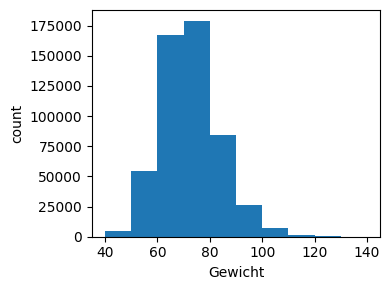

In [171]:
# Daten (männlich):

plt.figure(figsize=(4, 3))
plt.hist(data_m['Gewicht'])
plt.xlabel('Gewicht')
plt.ylabel('count')
plt.tight_layout()

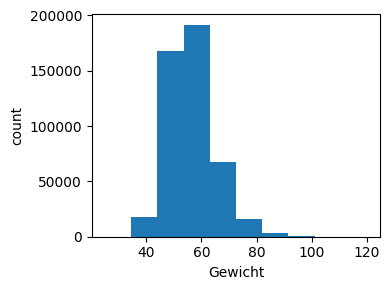

In [172]:
# Daten (weiblich):

plt.figure(figsize=(4, 3))
plt.hist(data_f['Gewicht'])
plt.xlabel('Gewicht')
plt.ylabel('count')
plt.tight_layout()

Männer:

In [173]:
data_m['Gewicht'].describe()

count    526158.000000
mean         70.128868
std          11.204636
min          40.000000
25%          65.000000
50%          70.000000
75%          75.000000
max         140.000000
Name: Gewicht, dtype: float64

In [174]:
# Daten aufteilen: Testdaten
X_train, X_test, y_train, y_test = train_test_split(data_m.drop(columns=['Gewicht']), data_m['Gewicht'], test_size=0.25)

# Nicht-Testdaten weiter aufteilen: Training und Entwicklung
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25)

print(len(X_train), len(X_dev), len(X_test))

295963 98655 131540


In [175]:
clf_m = LinearRegression()
clf_m.fit(X_train, y_train)

LinearRegression()

In [176]:
print(clf_m.intercept_, clf_m.coef_)

-139.72446776996568 [ 0.00000000e+00  5.81248262e-04  8.27328930e-01  6.29286732e-03
  1.59278507e-03 -1.32631727e-04 -1.77520989e-04 -1.04464198e-04
  7.31344060e-04  5.05239495e-04  9.15697687e-05 -3.66694014e-02
 -4.24209569e-04  2.06204117e-03  1.93524317e-05  1.66501846e-02
 -3.19426209e-02  2.84502716e+00]


In [177]:
# Vorhersage machen und evaluieren
predicted = clf_m.predict(X_dev)
expected = y_dev

print("RMSE: ")
RMSE(expected, predicted)

RMSE: 


0.5565807067526878

Ein RMSE von etwa 0,546 bedeutet, dass bei einer Modellvorhersage das Gewicht durchschnittlich um 0,546 Einheiten zu hoch oder zu tief sein wird.

Betrachtet man die Spanne der Gewichtsverteilung, die von 40 bis 140 reicht, ist dieser Wert auffällig gut.

In einem nächsten Schritt muss man nun überprüfen, woran dies liegt. 
Es wird vermutet, dass entweder die Test- und Trainingsdaten nicht sauber getrennt wurden oder, dass es sehr starke Abhängigkeiten in den verwendeten Features gibt.

In [178]:
# Erneutes Aufteilen der Daten: 

X_train, X_test, y_train, y_test = train_test_split(data_m.drop(columns=['Gewicht']), data_m['Gewicht'], test_size=0.25)

print(len(X_train), len(X_test))

394618 131540


In [179]:
# Erneutes Training des Modells:

clf_m = LinearRegression()
clf_m.fit(X_train, y_train)

LinearRegression()

In [180]:
# Vorhersage machen und evaluieren
predicted = clf_m.predict(X_test)
expected = y_test

print("RMSE: ")
RMSE(expected, predicted)

RMSE: 


0.5535167003297998

In [181]:
print(clf_m.intercept_, clf_m.coef_.round(4))

print(clf_m.feature_names_in_)

-139.89643772234 [ 0.0000e+00  6.0000e-04  8.2800e-01  6.0000e-03  1.9000e-03 -2.0000e-04
 -2.0000e-04 -0.0000e+00  6.0000e-04  4.0000e-04  1.0000e-04 -3.4500e-02
 -4.0000e-04  2.1000e-03  0.0000e+00  1.7000e-02 -3.6200e-02  2.8457e+00]
['Geschlecht' 'Alter' 'Größe' 'Hüftumfang' 'Systolischer Blutdruck'
 'Diastolischer Blutdruck' 'Nüchterner Blutzucker' 'Totale Cholesterin'
 'HDL_Cholesterin' 'LDL_Cholesterin' 'Triglycerid' 'Hämoglobin' 'SGOT_AST'
 'SGOT_ALT' 'gamma_GTP' 'Raucher_Status' 'Trinker' 'Body-Mass-Index']


Der weitere Versuch hat gezeigt, dass der Urspung des sehr genauen RMSE-Wertes nicht an der Aufteilung der Test- & Trainingsdaten liegt.

Bei der Untersuchung der Koeffizienten zeigt sich, dass der BMI mit in den Daten ist, der auch den höchsten Einfluss auf den Zielwert hat.

Diesen werden wir folgend entfernen.

In [182]:
data_m = data_m.drop(columns=['Body-Mass-Index'])

data_m.head()

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Systolischer Blutdruck,Diastolischer Blutdruck,Nüchterner Blutzucker,Totale Cholesterin,HDL_Cholesterin,LDL_Cholesterin,Triglycerid,Hämoglobin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker
0,1,35,170,75,90.0,120.0,80.0,99.0,193.0,48.0,126.0,92.0,17.1,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,130.0,82.0,106.0,228.0,55.0,148.0,121.0,15.8,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,120.0,70.0,98.0,136.0,41.0,74.0,104.0,15.8,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,145.0,87.0,95.0,201.0,76.0,104.0,106.0,17.6,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,138.0,82.0,101.0,199.0,61.0,117.0,104.0,13.8,19.0,12.0,25.0,1.0,0


In [183]:
# Erneutes Aufteilen der Daten: 

X_train, X_test, y_train, y_test = train_test_split(data_m.drop(columns=['Gewicht']), data_m['Gewicht'], test_size=0.25)

print(len(X_train), len(X_test))

394618 131540


In [184]:
# Erneutes Training des Modells:

clf_m = LinearRegression()
clf_m.fit(X_train, y_train)

LinearRegression()

In [185]:
# Vorhersage machen und evaluieren
predicted = clf_m.predict(X_test)
expected = y_test

print("RMSE: ")
RMSE(expected, predicted)

RMSE: 


25.824467052366966

Nach einem erneuten Durchlauf und Berücksichtigung der oben getroffenen Annahmen wurde in diesem Versuch ein realistischerer Wert erzielt. Es hat sich gezeigt, dass der BMI für die Analyse nicht sinnvoll ist, da er vom Modell wieder "zurückgerechnet" wird, sodass das Gewicht direkt aus ihm berechnet wird.

Bei einer Spanne der Daten von 40 bis 140 kg ist eine durchschnittlich zu erwartende Abweichung von rund 25 kg sehr hoch.

Frauen:

In [186]:
data_f['Gewicht'].describe()

count    464811.000000
mean         55.537573
std           8.873403
min          25.000000
25%          50.000000
50%          55.000000
75%          60.000000
max         120.000000
Name: Gewicht, dtype: float64

In [187]:
data_f = data_f.drop(columns=['Body-Mass-Index'])

data_f.head()

,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Systolischer Blutdruck,Diastolischer Blutdruck,Nüchterner Blutzucker,Totale Cholesterin,HDL_Cholesterin,LDL_Cholesterin,Triglycerid,Hämoglobin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker
6,0,45,150,55,69.0,101.0,58.0,89.0,196.0,66.0,115.0,75.0,12.3,19.0,12.0,12.0,1.0,0
12,0,55,150,55,72.3,130.0,80.0,106.0,183.0,51.0,89.0,214.0,13.1,20.0,20.0,31.0,1.0,0
14,0,30,160,50,76.0,129.0,77.0,79.0,205.0,53.0,108.0,219.0,14.5,21.0,24.0,58.0,1.0,0
16,0,25,160,65,73.0,126.0,78.0,96.0,148.0,54.0,82.0,60.0,12.3,12.0,7.0,9.0,1.0,1
20,0,35,170,50,67.0,111.0,65.0,88.0,174.0,66.0,98.0,46.0,12.1,19.0,13.0,18.0,1.0,1


In [188]:
# Daten aufteilen: Testdaten
X_train, X_test, y_train, y_test = train_test_split(data_f.drop(columns=['Gewicht']), data_f['Gewicht'], test_size=0.20)

# Nicht-Testdaten weiter aufteilen: Training und Entwicklung
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.25)

print(len(X_train), len(X_dev), len(X_test))

278886 92962 92963


In [189]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [190]:
print(clf.intercept_, clf.coef_)

-76.92060306856688 [ 0.00000000e+00 -1.10411503e-01  4.82833724e-01  7.44767996e-01
  2.48667380e-02  3.32065918e-02  2.59707431e-03  2.81830535e-03
 -2.55407356e-02  4.54463247e-03  5.79742864e-04  5.34318522e-02
 -3.18449794e-02  4.65876789e-02 -3.02466029e-03 -2.32428815e-01
 -7.38759358e-02]


In [191]:
# Vorhersage machen und evaluieren
predicted = clf.predict(X_dev)
expected = y_dev

print("RMSE: ")
RMSE(expected, predicted)

RMSE: 


24.19903147476868

Auch bei den Frauen ist der RMSE mit einem Wert von etwa 24 sehr hoch.

Der Wert ist minimal besser als bei den Männern, dies liegt sehr wahrscheinlich daran, dass die Datenspanne etwas kleiner ist (25 kg bis 120 kg) im Vergleich zu den Männern (40 bis 140 kg).